In [33]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.zeros((1,1),requires_grad = True)
b = torch.zeros((1,1),requires_grad = True)

#print(w)
#print(b)

#lr = 1.0

optimizer = torch.optim.SGD([w,b], lr = 1.0)

for epoch in range(1001):
  #w.requires_grad_(True)   #기울기 계산 할거다~
  #b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, w ) + b) #가설함수  -> 각각 입력에 대해 출력을 계산한것?
  cost = torch.mean(- y_train * torch.log(hypothesis) - (1 - y_train) * torch.log(1 - hypothesis))

  optimizer.zero_grad() #기울기값 초기화 -> 이거 안하면 기울기 값이 누적되서 문제가 생깁니다!
  cost.backward() #기울기 계산
  optimizer.step() # 파라미터 업데이트

  #with torch.no_grad():  #no_grad() -> 여기서는 무슨 연산을 해도 그래프를 그리지 않겠다! (원래 내부적으로 pytorch에서 그래프를 그린데)
    #파라미터 업데이트
    #w = w - lr * w.grad
    #b = b - lr * b.grad

  if epoch % 100 == 0:
    print('epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), w.squeeze(), b.squeeze()))

  

epoch: 0, cost: 0.693147, w: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, w: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, w: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, w: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, w: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, w: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, w: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, w: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, w: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, w: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, w: -2.878112, b: 8.723699


In [22]:
with torch.no_grad():
  x_test = torch.FloatTensor([[4.5],[1.1]])
  y_test = torch.sigmoid(torch.mm(x_test,w)+b)
  print(torch.round(y_test))

tensor([[0.],
        [1.]])


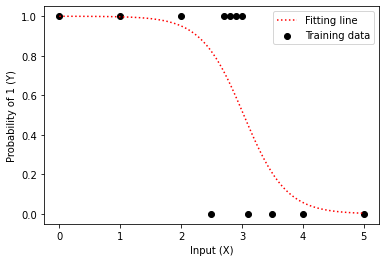

In [44]:
import matplotlib.pyplot as plt

with torch.no_grad():
  x_tmp = torch.linspace(0,5,100).unsqueeze(1) #linspace 는 0~5 까지 100개로 나눠라 라는 뜻!
  #print(x_tmp)
  y_tmp = torch.sigmoid(torch.mm(x_tmp,w)+b)

  plt.plot(x_tmp,y_tmp,":r",label="Fitting line")
  plt.scatter(x_train,y_train,c= "black",label="Training data")
  plt.xlabel("Input (X)")
  plt.ylabel("Probability of 1 (Y)")
  plt.legend()
  plt.show()

In [39]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty='none')

model.fit(x_train,y_train)

print(model.coef_,model.intercept_)

res = model.predict([[4.5],[1.1]])
print(res)

[[-3.10385806]] [9.39776831]
[0 1]
